# Defect_Classification_CNN

* Written by: Angelo D. Bonzanini and Ketong Shao
* Date: June-July 2021

<< Code Desctription >>

## Imports

In [1]:
# General
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image as im

# Tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Model
import tensorflow_addons as tfa
# ImageAI
from imageai.Detection import ObjectDetection

## Load SEM and EDX data provided by Lam Research

In [7]:
execution_path = os.path.join(os.getcwd())
targetDir = os.path.join(execution_path , "../Data/CNN_Data_LAM")
trainData = np.load(targetDir+'/train_data_6rot_3layer.npy', allow_pickle=True)
testData = np.load(targetDir+'/train_data_0rot_3layer.npy', allow_pickle=True)

### Plot the data to get intuition on the structure

Overall training data dimensions: (23880, 4)
-----------------------------------------------
xTrain[i, 0] shape: (140, 140)
xTrain[i, 1] shape: (1, 4096)
xTrain[i, 2] shape: (4096,)
xTrain[i, 3] shape: (8,)
-----------------------------------------------


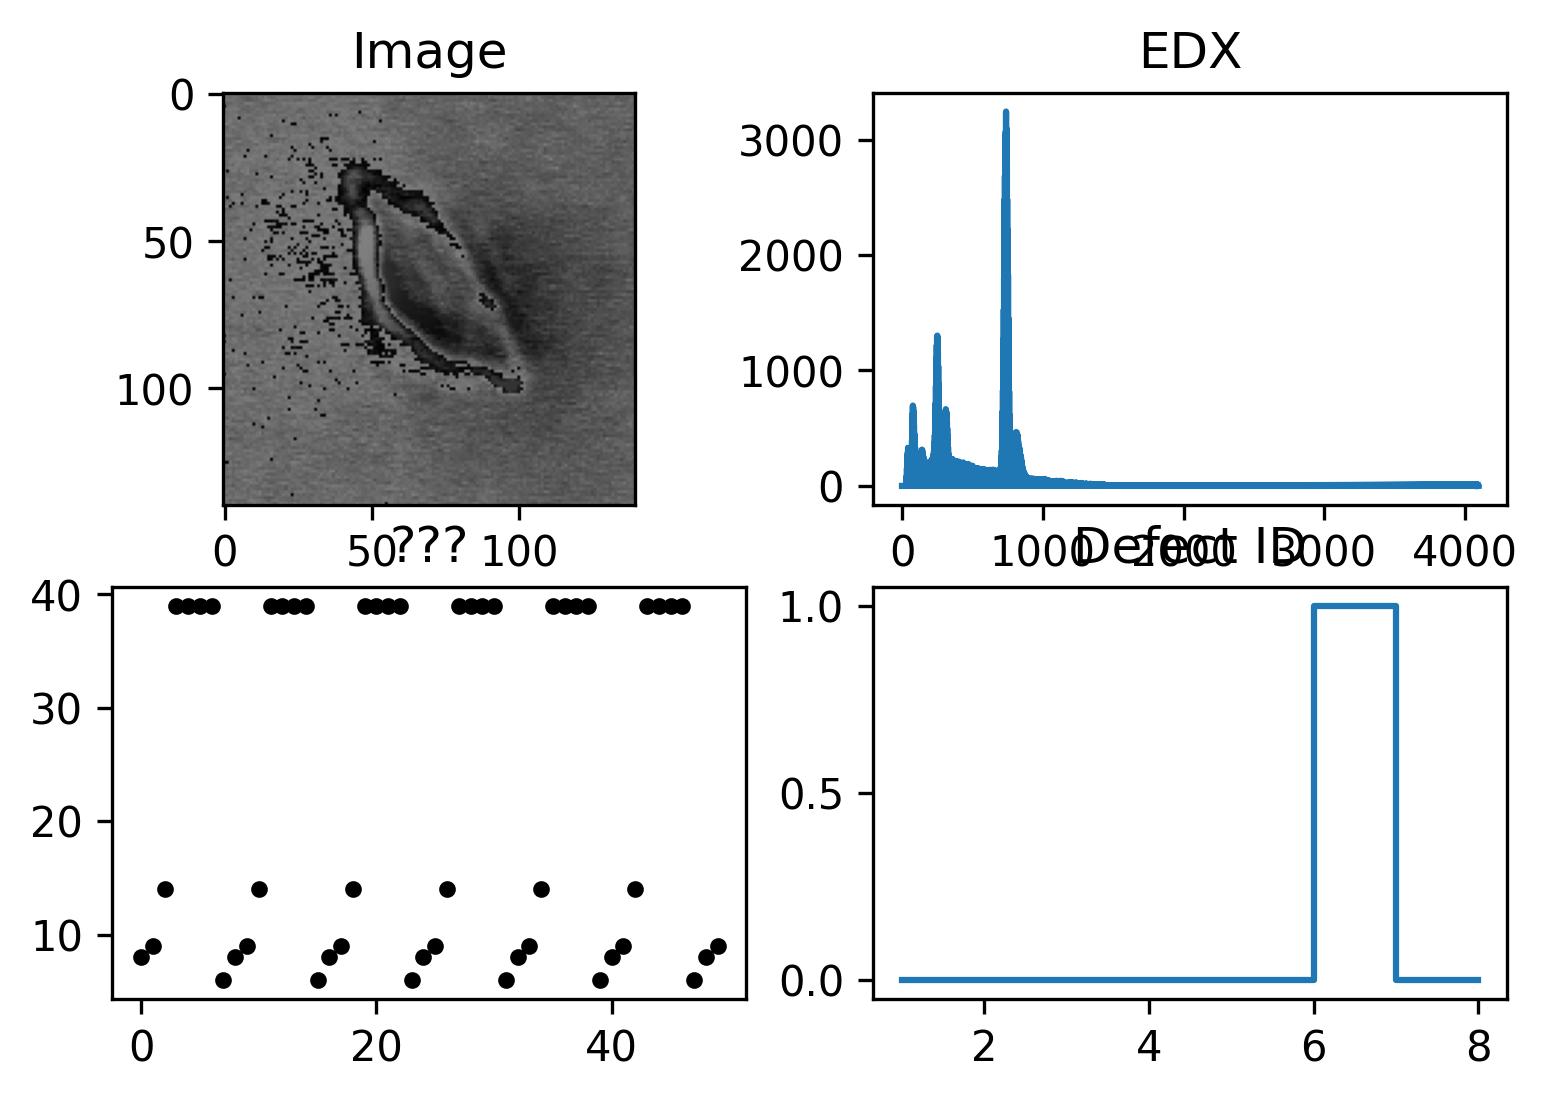

In [8]:
# Print dimensions of each array within the array
print('Overall training data dimensions:', trainData.shape)
print('-----------------------------------------------')
for j in range(0, 4):
    print('xTrain[i, %d] shape:' %j, trainData[0,j].shape)
print('-----------------------------------------------')

# Plot
plt.figure(dpi=300)
plt.subplot(221)
plt.imshow(trainData[0, 0], cmap='gray', vmin=-1, vmax=1)
plt.title('Image')
plt.subplot(222)
plt.plot(trainData[0, 1][0, :])
plt.title('EDX')
plt.subplot(223)
plt.plot(trainData[0, 2][0:50], 'k.')
plt.title('???')
plt.subplot(224)
plt.step(list(range(1, len(trainData[0,3])+1)), trainData[0, 3])
plt.title('Defect ID')
plt.show()

## Define a class containing all the parameters

In [9]:
class Parameters:
    def __init__(self):
        self.Ntrain = trainData.shape[0]
        self.imgSize = [trainData[0,0].shape[0],trainData[0,0].shape[1]]
        self.dropoutRate = 0.5
        

p = Parameters();

### Extract Training Images and Labels and re-scale for RGB (3-channel) conversion

In [144]:
trainImages = (trainData[0:-100,0]+1)*255/2
trainLabels = (trainData[0:-100,3])
trainLabels = np.concatenate(trainLabels).reshape(len(trainLabels), -1)

valImages = (trainData[-100:,0]+1)*255/2
valLabels = trainData[-100:,3]
valLabels = np.concatenate(valLabels).reshape(len(valLabels), -1)

testImages = testData[:,0]
testLabels = testData[:,3]
testLabels = np.concatenate(testLabels).reshape(len(testLabels), -1)

In [151]:
'''
# aa = trainImages[0]
# plt.imshow(aa)
# plt.show()

# aaRGB = im.fromarray(aa).convert('RGB')
# plt.imshow(aaRGB)
# plt.show()

# aaPixels = np.array(aaRGB.getdata()).reshape(p.imgSize[0], p.imgSize[1], 3)
# plt.imshow(aaPixels)
# plt.show()

xTrain = []
for i in range(0, len(trainImages)):
    print('iteration %d of %d' %(i, len(trainImages)))
    imgRGB  = im.fromarray(trainImages[i]).convert('RGB')
    xTrain += [np.array(imgRGB.getdata()).reshape(p.imgSize[0], p.imgSize[1], 3)]
np.save('xTrain', xTrain)

xVal = []
for i in range(0, len(valImages)):
    print('iteration %d of %d' %(i, len(valImages)))
    imgRGB  = im.fromarray(valImages[i]).convert('RGB')
    xVal += [np.array(imgRGB.getdata()).reshape(p.imgSize[0], p.imgSize[1], 3)]
np.save('../Data/xVal', xVal)
'''


iteration 0 of 100
iteration 1 of 100
iteration 2 of 100
iteration 3 of 100
iteration 4 of 100
iteration 5 of 100
iteration 6 of 100
iteration 7 of 100
iteration 8 of 100
iteration 9 of 100
iteration 10 of 100
iteration 11 of 100
iteration 12 of 100
iteration 13 of 100
iteration 14 of 100
iteration 15 of 100
iteration 16 of 100
iteration 17 of 100
iteration 18 of 100
iteration 19 of 100
iteration 20 of 100
iteration 21 of 100
iteration 22 of 100
iteration 23 of 100
iteration 24 of 100
iteration 25 of 100
iteration 26 of 100
iteration 27 of 100
iteration 28 of 100
iteration 29 of 100
iteration 30 of 100
iteration 31 of 100
iteration 32 of 100
iteration 33 of 100
iteration 34 of 100
iteration 35 of 100
iteration 36 of 100
iteration 37 of 100
iteration 38 of 100
iteration 39 of 100
iteration 40 of 100
iteration 41 of 100
iteration 42 of 100
iteration 43 of 100
iteration 44 of 100
iteration 45 of 100
iteration 46 of 100
iteration 47 of 100
iteration 48 of 100
iteration 49 of 100
iteration 

In [154]:
xTrain = np.load(execution_path+'/../Data/xTrain.npy')
xVal = np.load(execution_path+'/../Data/xVal.npy')

23780


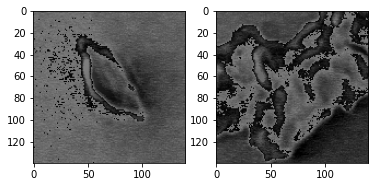

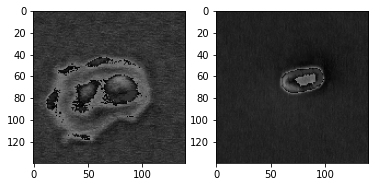

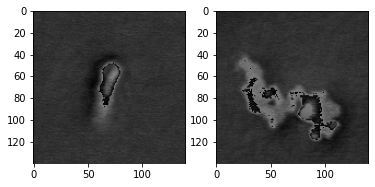

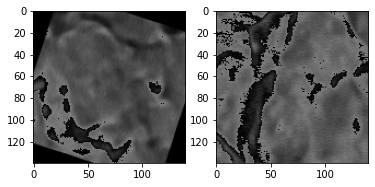

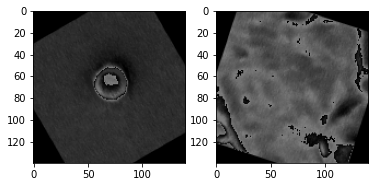

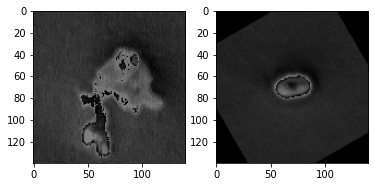

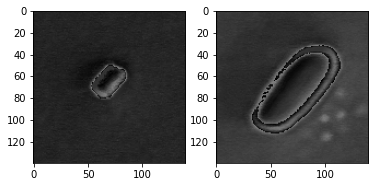

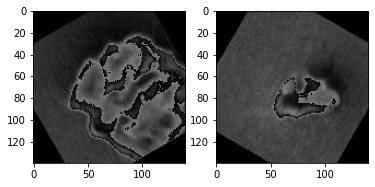

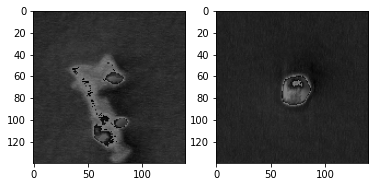

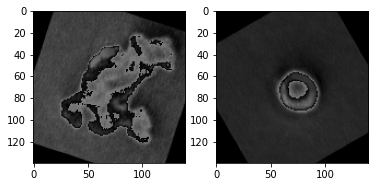

In [155]:
print(len(xTrain))
for i in range(0, 10):
    plt.subplot(121)
    plt.imshow(xTrain[i])
    plt.subplot(122)
    plt.imshow(xVal[i])
    plt.show()

### Re-scale image and convert it to RGB (3-channels) for object detection purposes (Later)

### Run object detection algorithm (Later)

In [156]:
'''
execution_path = os.getcwd()

detector = ObjectDetection()
# detector.setModelTypeAsRetinaNet()
# detector.setModelPath(os.path.join(execution_path , "resnet50_coco_best_v2.1.0.h5"))
detector.setModelTypeAsYOLOv3()
detector.setModelPath(os.path.join(execution_path , "pretrained-yolov3.h5"))
detector.loadModel()
# detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path, "defectImage.jpeg"), output_image_path=os.path.join(execution_path , "defectImageID.jpg"))
detections = detector.detectObjectsFromImage(input_type = "array", input_image=aaRGB, output_image_path=os.path.join(execution_path , "Defect_Images/defectImageID.jpg"))


for eachObject in detections:
    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )
    
'''

'\nexecution_path = os.getcwd()\n\ndetector = ObjectDetection()\n# detector.setModelTypeAsRetinaNet()\n# detector.setModelPath(os.path.join(execution_path , "resnet50_coco_best_v2.1.0.h5"))\ndetector.setModelTypeAsYOLOv3()\ndetector.setModelPath(os.path.join(execution_path , "pretrained-yolov3.h5"))\ndetector.loadModel()\n# detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path, "defectImage.jpeg"), output_image_path=os.path.join(execution_path , "defectImageID.jpg"))\ndetections = detector.detectObjectsFromImage(input_type = "array", input_image=aaRGB, output_image_path=os.path.join(execution_path , "Defect_Images/defectImageID.jpg"))\n\n\nfor eachObject in detections:\n    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )\n    \n'

## Build the CNN model

### Input Layer
* 224x224 RGB image (3 channels)

### 1st Convolutional Block
* 2 convolutional layers
    * Filters: 64; Pixel size: 3x3; Stride: 1; Activation function: ReLU
* 1 max-pooling layer
    * Pixel size: 2x2; Stride: 2
    
### 2nd Convolutional Block
* 2 convolutional layers
    * Filters: 128; Pixel size: 3x3; Stride: 1; Activation function: ReLU
* 1 max-pooling layer
    * Pixel size: 2x2; Stride: 2
    
### 3rd Convolutional Block
* 3 convolutional layers
    * Filters: 256; Pixel size: 3x3; Stride: 1; Activation function: ReLU
* 1 max-pooling layer
    * Pixel size: 2x2; Stride: 2

### 4th & 5th Convolutional Blocks
* 3 convolutional layers
    * Filters: 512; Pixel size: 3x3; Stride: 1; Activation function: ReLU
* 1 max-pooling layer
    * Pixel size: 2x2; Stride: 2
    
### 1st Fully-connected Layer
* 4096 nodes
* ReLU activation function
* 50% dropout rate

### 2nd Fully-connected Layer
* 4096 nodes
* ReLU activation function
* 50% dropout rate

### Output Layer
* 1000 nodes
* Softmax activation function

In [234]:
class CNN():
    def buildModel(self):
        # Input structure as a placeholder
        CNNinput = Input(shape =(140,140,3))

        # 1st Convolutional block
        x = Conv2D(filters=64, kernel_size = (3, 3), strides = 1, padding = 'same', 
                   activation='relu')(CNNinput)
        x = Conv2D(filters=64, kernel_size = (3, 3), strides = 1, padding = 'same', 
                   activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # 2nd Convolutional block
        for i in range(0, 2):
            x = Conv2D(filters=128, kernel_size = (3, 3), strides = 1, padding = 'same', 
                       activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # 3rd Convolutional block
        for i in range(0, 3):
            x = Conv2D(filters=256, kernel_size = (3, 3), strides = 1, padding = 'same', 
                       activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # 4th Convolutional block
        for i in range(0, 3):
            x = Conv2D(filters=512, kernel_size = (3, 3), strides = 1, padding = 'same', 
                       activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # 5th Convolutional block
        for i in range(0, 3):
            x = Conv2D(filters=512, kernel_size = (3, 3), strides = 1, padding = 'same', 
                       activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # Fully connected layers
        x = Flatten()(x)
        for i in range(0,2):
            x = Dense(units = 4096, activation ='relu')(x) 
            x = Dropout(p.dropoutRate)(x)
        CNNoutput = Dense(units = 8, activation ='softmax')(x)

        # Create model
        model = Model(inputs = CNNinput, outputs = CNNoutput)
        return model
    
    def trainCNN(self, model, xTrain, yTrain, xVal, yVal):
        model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        
        history = model.fit(xTrain, yTrain, epochs=10, 
                            validation_data=(xVal, yVal))
        return history

In [235]:
# Instantiate object
cnn = CNN()
model = cnn.buildModel()
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 140, 140, 3)]     0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 140, 140, 64)      1792      
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 140, 140, 64)      36928     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 70, 70, 64)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 70, 70, 128)       73856     
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 70, 70, 128)       147584    
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 35, 35, 128)       0  

## Train the CNN

In [225]:
from matplotlib import cm
from numpy import asarray
from PIL import ImageOps

In [226]:
trainImagesRGB = np.concatenate(xTrain, axis=0).reshape(-1, 140, 140, 3)
valImagesRGB = np.concatenate(xVal, axis=0).reshape(-1, 140, 140, 3)

print(trainImagesRGB.shape)
print(valImagesRGB.shape)

trainLabelsVec = trainLabels.argmax(1).reshape(-1,1)
valLabelsVec = valLabels.argmax(1).reshape(-1,1)

plt.subplot(121)
plt.imshow(trainImagesRGB[1,:,:])
plt.subplot(122)
plt.imshow(valImagesRGB[1,:,:])
plt.show()

(23780, 140, 140, 3)
(100, 140, 140, 3)


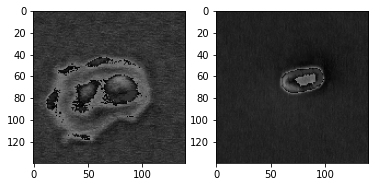

In [237]:
# [print(i.shape, i.dtype) for i in model.inputs]
# [print(o.shape, o.dtype) for o in model.outputs]
# [print(l.name, l.input_shape, l.dtype) for l in model.layers]
print(trainImagesRGB.shape)
print(trainLabels.shape)
print(valImagesRGB.shape)
print(valLabels.shape)

(23780, 140, 140, 3)
(23780, 1)
(100, 140, 140, 3)
(100, 1)


In [239]:
# Train the CNN
history = cnn.trainCNN(model, trainImagesRGB, trainLabels, valImagesRGB, valLabels)

Epoch 1/10
744/744 [==============================] - 5232s 7s/step - loss: 56722.6105 - accuracy: 0.2688 - val_loss: 1.9224 - val_accuracy: 0.2600
Epoch 2/10
193/744 [======>.......................] - ETA: 1:10:51 - loss: 1.8516 - accuracy: 0.2566

KeyboardInterrupt: 

## Old Code

In [ ]:
# Load
# [...]

# Outlier detection using clustering?
# [...]

# Data augmentation by roating 60 degrees
# [...]
# rotate = tfa.image.rotate(img, tf.constant(np.pi/3))
# visualize(image, rotated)
